<center><h1>Email Spam Filter</h1></center>
In this project, we will implement Naïve Bayes Theorem to createe a simple spam filter. A small data set has been provided through the COMP13212 module to train and test the model.
    
<p>The messages within the datasets have already been classified as ham (not spam), or spam. </p> 

It needs to be noted, however, this project will not use the scikit-learn library, but directly implements the Bayesian Theorem. Bayes Theorem can give us the probability that a message is spam S for a given event E

<center>
<h1>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h1>
</center>

<p>Where:</p>
<p>$P\left(S\middle|\ E\right)$, the probability that the message is spam given the event occurred.</p>
<p>$P\left(S\right)$, the prior probability that a message is spam.</p>
<p>$P\left(\lnot S\right)$, the prior probability that a message is not spam.  </p>

Note:  $P\left(S\right)$ and $P\left(\lnot S\right)$ are prior values, or prior beliefs.  This value could be calculated using the number of spam and number of ham classifications in the data set. The success of the filter depends on the prior values.

<p>$P\left(E\middle|\ S\right)$, the probability that event E occurs in a spam emails.</p>

<p>$P\left(E|\lnot S\right)$, the probability that event E occurs in non-spam emails.</p>

<h3>The Implementation</h3>
<p>The implementation is quite simple and therefore not accounted for things like filtering small often used words. The implementation also does not calculate probabilities of a word in the frequency list not appearing in spam.  We have also filtered things like telephone numbers, which could be used to identify spam. </p>

In the end of this project, I have suggested a few aspects that could be improved for further development in the future.


<h3>1.  Read the dataset into a dataframe and explore</h3>

First, we will import Pandas, Matplotlib for visualisation, numpy for numbers processing, and the WordCloud library for visualisation.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import prod, log2
from wordcloud import WordCloud

Next, the available data set will be read with latin-1 encoding. The first 10 lines of the data set will be shown.

In [ ]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


<h3>2. Clean the data</h3>
<p>We are only interested in words, so we will clean the data so that all punctuations are removed.  The clean dataset will only contain alpha characters (including spaces) in lowercase.</p>

<!-- <table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Category</th>
      <th>Message</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>ham</td>
      <td>go until jurong point crazy available only in ...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>ham</td>
      <td>ok lar joking wif u oni</td>
    </tr>
    <tr>
      <th>2</th>
      <td>spam</td>
      <td>free entry in  a wkly comp to win fa cup final...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>ham</td>
      <td>u dun say so early hor u c already then say</td>
    </tr>
    <tr>
      <th>4</th>
      <td>ham</td>
      <td>nah i dont think he goes to usf he lives aroun...</td>
    </tr>
  </tbody>
</table>

[2 Marks] -->

In [ ]:
# Drop unused columns and renaming column name
clean = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
clean.rename(columns = {'v1':'Category', 'v2':'Message'}, inplace = True)

# Remove punctuations and lowercase characters
clean["Message"] = clean['Message'].str.replace('[^\w\s]','', regex=True).str.lower()

# Clean dataframe
clean.head(5)

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


<h3>3. Split the Data</h3>
Now, we will split the data into two random samples, one for training the model and the other for testing the model. The train data set will contain 75% of the data and the test dataset, the remaining 25%.<p>  

In [ ]:
# Training set
train_data = clean.sample(frac=0.75, random_state=1)

# Test set
test_data = clean.drop(train_data.index).sample(frac=1.0)

<h3>4. Create a Word Frequency DataFrame</h3>
<p>Next, we will create a word frequency dataset that contains each word with the number of times (frequency) it appears in a spam and ham message. </p>
<!-- <p>Below is an example of what the DataFrame would look like.</p> -->
<!-- <table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>#Spam</th>
      <th>#Ham</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>go</td>
      <td>27</td>
      <td>196</td>
    </tr>
    <tr>
      <td>1</td>
      <td>until</td>
      <td>4</td>
      <td>17</td>
    </tr>
    <tr>
      <td>2</td>
      <td>jurong</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>3</td>
      <td>point</td>
      <td>1</td>
      <td>9</td>
    </tr>
    <tr>
      <td>4</td>
      <td>crazy</td>
      <td>4</td>
      <td>8</td>
    </tr>
    <tr>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <td>7253</td>
      <td>salesman</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7254</td>
      <td>pity</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7255</td>
      <td>soany</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7256</td>
      <td>suggestions</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7257</td>
      <td>bitching</td>
      <td>1</td>
      <td>0</td>
    </tr>
  </tbody>
</table> -->


In [ ]:
words = {}

for i in range(len(train_data)):
  for word in train_data.iloc[i]["Message"].split():
    if word not in words:
      words[word] = [0, 0]
      if train_data.iloc[i]["Category"] == "spam":
        words[word][0] += 1
      else:
        words[word][1] += 1
    elif word in words:
      if train_data.iloc[i]["Category"] == "spam":
        words[word][0] += 1
      else:
        words[word][1] += 1

words = [[word]+words[word] for word in words]

word_freq = pd.DataFrame(words, columns = ['Word', '#Spam', '#Ham'])
word_freq

,Word,#Spam,#Ham
0,convey,0,6
1,my,6,568
2,regards,0,5
3,to,533,1152
4,him,2,83
...,...,...,...
8101,cashto,1,0
8102,08000407165,1,0
8103,getstop,1,0
8104,88222,1,0


<h3>5. Visualise the Data</h3>
Next, I will use a Word Cloud library to visualise the most common words contained in spam messages.

[Example of a Word Cloud Image](https://drive.google.com/open?id=1lVRGHtMB1AMJf-JSi7MmcHbZB_BvBhGC)




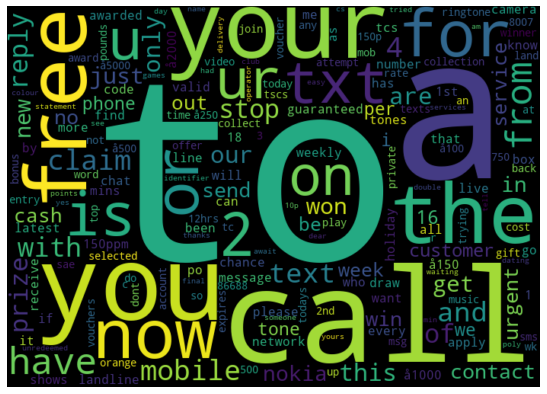

In [ ]:
spam_words = {}

for i in word_freq.index:
  spam_words[word_freq.loc[i]['Word']] = word_freq.loc[i]['#Spam']

wordcloud = WordCloud(height=500, width=700).generate_from_frequencies(spam_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h3>6.  Calculate $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$</h3>
<p>Then, we will create a dataframe that gives the probability of each word being found in a spam and ham message.</p>
<p>To calculate the probability of a word being spam, we will divide the number of times the word was found in spam by the total number of spam words, likewise to calculate the probability of each word being a ham or not spam.</p>
<p>If a word was not found in ham or spam it will cause problems later because the probability calculated will be zero. Therefore, we will use a pseudocount k and estimate the probability of seeing the word. We will use k = 0.5 in this project.</p>
<p>$P\left(E\middle| S\right)$ = (number of spams containing the word + k) / (total number of spam words + 2 * k).</p>
<p>Likewise, for $P\left(E|\lnot S\right)$.</p>
<!-- <table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>P(E|S)</th>
      <th>P(E|¬S)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>go</td>
      <td>0.053322</td>
      <td>0.050055</td>
    </tr>
    <tr>
      <th>1</th>
      <td>until</td>
      <td>0.011364</td>
      <td>0.004275</td>
    </tr>
    <tr>
      <th>2</th>
      <td>jurong</td>
      <td>0.002622</td>
      <td>0.000138</td>
    </tr>
    <tr>
      <th>3</th>
      <td>point</td>
      <td>0.002622</td>
      <td>0.002344</td>
    </tr>
    <tr>
      <th>4</th>
      <td>crazy</td>
      <td>0.011364</td>
      <td>0.002344</td>
    </tr>
  </tbody>
</table> -->


In [ ]:
# Calculate total number of spam words
total_spam = len(word_freq[word_freq['#Spam'] != 0])
total_ham = len(word_freq[word_freq['#Ham'] != 0])

# Calculate probability of event given it is spam and not spam
k = 0.5
word_prob = word_freq.copy()
word_prob['P(E|S)'] = (word_prob['#Spam'] + k) / (total_spam + 2 * k)
word_prob['P(E|¬S)'] = (word_prob['#Ham'] + k) / (total_ham + 2 * k)
word_prob.drop(columns=['#Spam', '#Ham'], inplace=True)
word_prob.head()

,Word,P(E|S),P(E|¬S)
0,convey,0.000190,0.001017
1,my,0.002469,0.088939
2,regards,0.000190,0.000860
3,to,0.202621,0.180304
4,him,0.000949,0.013063


<h3>7. Checking the 'spamliness' of a single word</h3>
<p>Now that we have trained the model, we will test the model.  Before we use the test_data, first let’s check how the model calculates the spamliness of a single word.  This is where we use the Bayes Theorem formula.  We have already calculated $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$, so we can just extract these values from the word_prob DataFrame.</p>
<p>After experimenting and tweaking the model, we found out that the most optimal prior values is calculated using the data set classification and the pseudocount.</p>
<h3>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h3>
<!-- <pre>
Output
Word = ['free']
P(E|S) = [0.29108392]
P(E|¬S) = [0.01365141]
P(S|E) = [0.93427577]
P(¬S|E) = [0.06572423]
</pre>

<p>[2 Marks]</p> -->

In [ ]:
# Calculating the prior values P(S) and P(¬S) using the data set classification
total = len(train_data)
P_s = (total_spam + k) / (total + 2 * k) # ~0.138
P_nots = (total_ham + k) / (total + 2 * k) # ~0.862

# word = free
P_e_s = word_prob[word_prob['Word'] == 'free'].iloc[0]['P(E|S)']
P_e_nots = word_prob[word_prob['Word'] == 'free'].iloc[0]['P(E|¬S)']

spamliness = (P_e_s * P_s) / (P_e_s * P_s + P_e_nots * P_nots)
hamliness = (P_e_nots * P_nots) / (P_e_s * P_s + P_e_nots * P_nots)

# Print output
print("Word = 'free'")
print("P(E|S) = " + str(P_e_s))
print("P(E|¬S) = " + str(P_e_nots))
print("P(S|E) = " + str(spamliness))
print("P(¬S|E) = " + str(hamliness))

Word = 'free'
P(E|S) = 0.060957083175085455
P(E|¬S) = 0.008369837296620776
P(S|E) = 0.7499790576058575
P(¬S|E) = 0.2500209423941425


<h3>8. Checking the 'spamliness' of several words</h3>
<p>To check the spamliness of several words contained in a message we multiply the probabilities.  The model assumes the words appear as independent events hence the naïve Bayes.  In reality of course, words are not independent events, but the model still performs well.  So we use the assumption that the words appear independently, and hence we multiply probabilities, so
$P(S\,|\, x_1,\dots,x_n)\approx \frac{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)}{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)+P(\neg S)\underset{i=1}{\overset{n}{\prod}}P(x_i | \neg S)}$

We calculate the probability for each word in a message being spam and  for each word not being spam.
Then, we will multiply the probabilities and compare the results.  If the result of multiplying the probabilities for spam is greater than the result of multiplying the probabilities for not spam, then we assume the message as spam.
</p>
<p>We will skip any words in the message that are not in the word probability dataframe calculated before.</p>

In [ ]:
# Calculate probability of all words in df being spam and not spam given the event 
word_prob['P(S|E)'] = (word_prob['P(E|S)']) * P_s / ((word_prob['P(E|S)']) * P_s + (word_prob['P(E|¬S)']) * P_nots)
word_prob['P(¬S|E)'] = (word_prob['P(E|¬S)']) * P_s / ((word_prob['P(E|S)']) * P_s + (word_prob['P(E|¬S)']) * P_nots)

# Take an example message
msg = train_data.iloc[0]["Message"] # 'convey my regards to him'

# Checking spamliness of several words
  # Calculate probabilities of being spam and not
def probabilities(msg):
  prob_spam = []
  prob_not_spam = []

  for word in msg.split():

    # skip any word not in word_prob dataframe
    if word not in word_prob['Word'].unique():
      continue

    # store probabilities in list
    prob_spam.append(word_prob[word_prob['Word'] == word].iloc[0]['P(S|E)'])
    prob_not_spam.append(word_prob[word_prob['Word'] == word].iloc[0]['P(¬S|E)'])
    
  # Multiply probabilities - this will change to avoid floating point underflow
  spam_prob = prod(prob_spam)
  not_spam_prob = prod(prob_not_spam)
    
  return spam_prob, not_spam_prob

# Classifying spam
def classify_spam(msg):
  spam_prob, not_spam_prob = probabilities(msg)
  
  if spam_prob > not_spam_prob:
    print("This message is spam.")
  else:
    print("This message is not spam.")

# Checking spamliness of several words
print("Message: " + msg)
classify_spam(msg)

Message: convey my regards to him
This message is not spam.


<h3>9. Avoiding floating point underflow</h3>
<p>Our aim is to compare two probabilities $P(S|x_1,\dots,x_n)$ with $P(\neg S|x_1,\dots,x_n),$ according to our model introduced in Section 8, both probabilities share a common denominator which does not affect comparison. Hence we will calculate numerators only, which are proportional to $P(S|x_1,\dots,x_n)$ and $P(\neg S|x_1,\dots,x_n).$
</p>

<p>Multiplying a set of small probabilities could result in a floating-point error.  This is where the product becomes too small to be represented correctly.  To avoid this we can take the logarithm of the probabilities and add them.  

To avoid multiplication of small numbers, we use the following property of $\log(x):$</p>
$$
\log(a\cdot b)=\log(a)+\log(b)
$$
<p>i.e. the log of the product is equal to the sum of logs (so instead of multiplying small numbers we will add them):</p>
$$
P(S|x_1,x_2,\dots,x_n)\propto P(S)\cdot P(x_1|S)\cdot \dots \cdot P(x_n|S)$$
<p>becomes</p>
$$\log(P(S|x_1,x_2,\dots,x_n))\propto \log\left(P(S)\cdot P(x_1|S)\cdot \dots  P(x_n|S)\right)=$$ $$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>So, to check spam or ham we just compare:</p>
$$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>and </p>
$$
\log(P(\neg S))+\log(P(x_1|\neg S))+\dots+\log(P(x_n|\neg S))
$$

In [ ]:
# Calculate probabilities of being spam and not
def probabilities(msg):
  prob_spam = []
  prob_not_spam = []
  
  for word in msg.split():

    # skip any word not in word_prob dataframe
    if word not in word_prob['Word'].unique():
      continue

    # store probabilities in list
    prob_spam.append(word_prob[word_prob['Word'] == word].iloc[0]['P(S|E)'])
    prob_not_spam.append(word_prob[word_prob['Word'] == word].iloc[0]['P(¬S|E)'])
    
  # Sum of logs to calc probability - previously multiplied
  spam_prob = sum(log2(prob_spam))
  not_spam_prob = sum(log2(prob_not_spam))
    
  return spam_prob, not_spam_prob

# Checking spamliness of several words
print("Message: " + msg)
classify_spam(msg)

Message: convey my regards to him
This message is not spam.


<h3>10. Testing the Model</h3>
<p>Now that we have tested the model using simple messages,  let’s test the model using the messages from the test dataset. Lastly, we will calculate the accuracy of the model in classifying messages as spam or ham.</p>
<!-- <pre>
match_spam 173
match_ham 843
thought_ham_is_spam 3
thought_spam_is_ham 357
Accuracy: 0.7383720930232558
</pre>
<p>[3 Marks]</p> -->


In [ ]:
# Updating function
def classify_spam(msg):
  spam_prob, not_spam_prob = probabilities(msg)
  
  if spam_prob > not_spam_prob:
    return "spam"
  else:
    return "ham"

# Test model
test_data['Test Category'] = test_data['Message'].apply(classify_spam)
test_data['Accurate'] = test_data.apply(lambda x: 1 if x['Category'] == x['Test Category'] else 0, axis=1)

match_spam = len(test_data[test_data['Test Category'] == 'spam'])
match_ham = len(test_data[test_data['Test Category'] == 'ham'])
thought_ham_is_spam = len(test_data[(test_data['Category'] == 'ham') & (test_data['Test Category'] == 'spam')])
thought_spam_is_ham = len(test_data[(test_data['Category'] == 'spam') & (test_data['Test Category'] == 'ham')])

print('match_spam ' + str(match_spam))
print('match_ham ' + str(match_ham))
print('thought_ham_is_spam ' + str(thought_ham_is_spam))
print('thought_spam_is_ham ' + str(thought_spam_is_ham))
print('Accuracy: ' + str(test_data['Accurate'].sum()/len(test_data)))

match_spam 164
match_ham 1229
thought_ham_is_spam 5
thought_spam_is_ham 13
Accuracy: 0.9870782483847811


<h3>11. Improvements</h3>
<p>The following are some suggestions or recommendations on how the accuracy of the model could be improved.</p>


* Find the optimal prior values or beliefs for better filter and accuracy.
* Use a larger data set and increase the amount of data.
* Trying different values of k pseudocount.
* Consider words as dependent events, instead of independent events.
* Use stopwords to avoid some common words.
* Remove words that have similar number of spam and ham proportions.



<h3></h3>